### HW9 TensorFlow Keras MLP
Andrew Logue

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

df = pd.read_csv('digits_8K.csv')
df

2024-04-22 21:28:20.629386: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-22 21:28:20.708695: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5765,8,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5766,3,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5767,2,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5768,6,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [2]:
# 1. arrange data into features & target arrays
X = df.iloc[:,1:]
Y = df.iloc[:,0] 

print(X)
print(Y)

      1x1  1x2  1x3  1x4  1x5  1x6  1x7  1x8  1x9  1x10  ...  28x19  28x20  \
0       0    0    0    0    0    0    0    0    0     0  ...    0.0    0.0   
1       0    0    0    0    0    0    0    0    0     0  ...    0.0    0.0   
2       0    0    0    0    0    0    0    0    0     0  ...    0.0    0.0   
3       0    0    0    0    0    0    0    0    0     0  ...    0.0    0.0   
4       0    0    0    0    0    0    0    0    0     0  ...    0.0    0.0   
...   ...  ...  ...  ...  ...  ...  ...  ...  ...   ...  ...    ...    ...   
5765    0    0    0    0    0    0    0    0    0     0  ...    0.0    0.0   
5766    0    0    0    0    0    0    0    0    0     0  ...    0.0    0.0   
5767    0    0    0    0    0    0    0    0    0     0  ...    0.0    0.0   
5768    0    0    0    0    0    0    0    0    0     0  ...    0.0    0.0   
5769    0    0    0    0    0    0    0    0    0     0  ...    NaN    NaN   

      28x21  28x22  28x23  28x24  28x25  28x26  28x27  28x28  


In [3]:
# 2. Split data into a training set and test set
#    Splitting data into 70% training and 30% test data:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.3, random_state=1, stratify=Y)
print('Labels count in y:', np.bincount(Y))
print('Labels count in y_train:', np.bincount(y_train))
print('Labels count in y_test:', np.bincount(y_test))

print(X_train.shape)
print(X_test.shape)
print(X_train)

Labels count in y: [542 659 605 576 577 524 536 588 565 598]
Labels count in y_train: [379 461 424 403 404 367 375 412 395 419]
Labels count in y_test: [163 198 181 173 173 157 161 176 170 179]
(4039, 784)
(1731, 784)
      1x1  1x2  1x3  1x4  1x5  1x6  1x7  1x8  1x9  1x10  ...  28x19  28x20  \
4553    0    0    0    0    0    0    0    0    0     0  ...    0.0    0.0   
3113    0    0    0    0    0    0    0    0    0     0  ...    0.0    0.0   
1978    0    0    0    0    0    0    0    0    0     0  ...    0.0    0.0   
3141    0    0    0    0    0    0    0    0    0     0  ...    0.0    0.0   
3566    0    0    0    0    0    0    0    0    0     0  ...    0.0    0.0   
...   ...  ...  ...  ...  ...  ...  ...  ...  ...   ...  ...    ...    ...   
837     0    0    0    0    0    0    0    0    0     0  ...    0.0    0.0   
1694    0    0    0    0    0    0    0    0    0     0  ...    0.0    0.0   
857     0    0    0    0    0    0    0    0    0     0  ...    0.0    0.0   
30

In [4]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

# Reshape the input data to match the expected input shape of the Flatten layer
X_train_std = X_train_std.reshape(-1, 28, 28)
X_test_std = X_test_std.reshape(-1, 28, 28)

# reset index of y_test
y_test = y_test.reset_index(drop=True)

In [5]:
# 3. Select the ML algorithm, and its parameteters
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

2024-04-22 21:28:23.826539: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [6]:
# 4. Build the model (.fit)
training_history = model.fit(X_train_std, y_train, epochs=10)

print(training_history.history['loss'])

Epoch 1/10
127/127 [==============================] - 1s 2ms/step - loss: 0.6597 - accuracy: 0.7982
Epoch 2/10
127/127 [==============================] - 0s 2ms/step - loss: 0.2163 - accuracy: 0.9361
Epoch 3/10
127/127 [==============================] - 0s 2ms/step - loss: 0.1201 - accuracy: 0.9710
Epoch 4/10
127/127 [==============================] - 0s 2ms/step - loss: 0.0739 - accuracy: 0.9859
Epoch 5/10
127/127 [==============================] - 0s 4ms/step - loss: 0.0476 - accuracy: 0.9916
Epoch 6/10
127/127 [==============================] - 0s 2ms/step - loss: 0.0306 - accuracy: 0.9970
Epoch 7/10
127/127 [==============================] - 0s 2ms/step - loss: 0.0214 - accuracy: 0.9990
Epoch 8/10
127/127 [==============================] - 0s 2ms/step - loss: 0.0153 - accuracy: 0.9998
Epoch 9/10
127/127 [==============================] - 0s 2ms/step - loss: 0.0118 - accuracy: 1.0000
Epoch 10/10
127/127 [==============================] - 0s 2ms/step - loss: 0.0093 - accuracy: 1.0000

In [7]:
# 5. Apply the model to the test data (.predict)
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])
predictions = probability_model.predict(X_test_std)

print(predictions[0])
print(np.argmax(predictions[0]))
print(y_test[0])

55/55 [==============================] - 0s 924us/step
[4.3680661e-06 2.6552675e-03 9.9064973e-06 3.2313386e-01 4.9081618e-06
 1.9106260e-02 1.2141198e-04 2.1116345e-03 3.9392095e-02 6.1346030e-01]
9
3


In [8]:
# 6. Estimate performance (accuracy score)
from sklearn import metrics 
test_loss, test_acc = model.evaluate(X_test_std,  y_test, verbose=2)

print('\nTest accuracy:', test_acc)

55/55 - 0s - loss: 0.2780 - accuracy: 0.9341 - 179ms/epoch - 3ms/step

Test accuracy: 0.9341421127319336


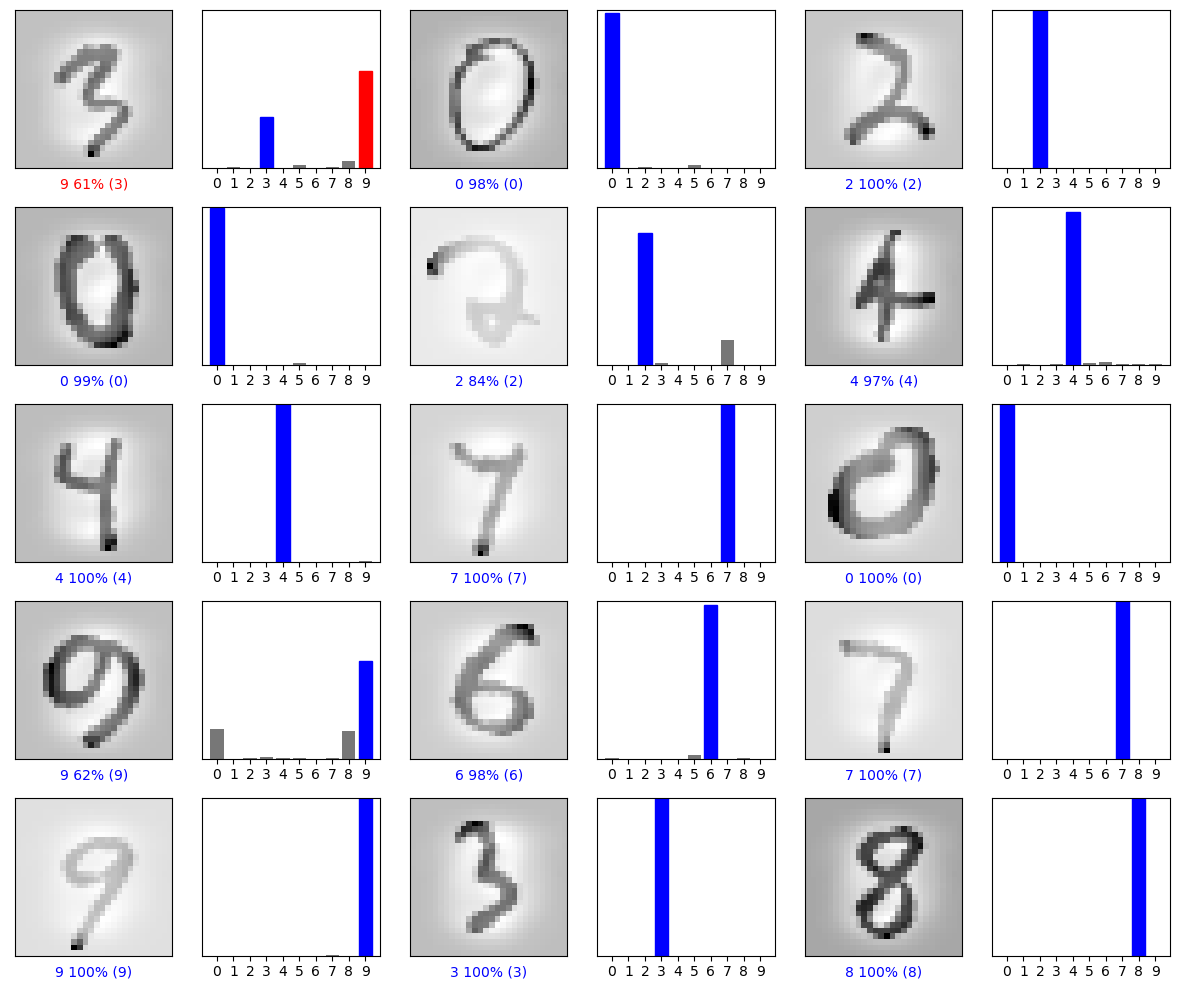

In [9]:
def plot_image(i, predictions_array, true_label, img):
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  # Reshape the image to its original shape
  img = img[i].reshape(28, 28)

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  true_label = true_label[i]
  
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(predicted_label,
                                        100*np.max(predictions_array),
                                        true_label),
                                        color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], y_test, X_test_std)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], y_test)
plt.tight_layout()
plt.show()

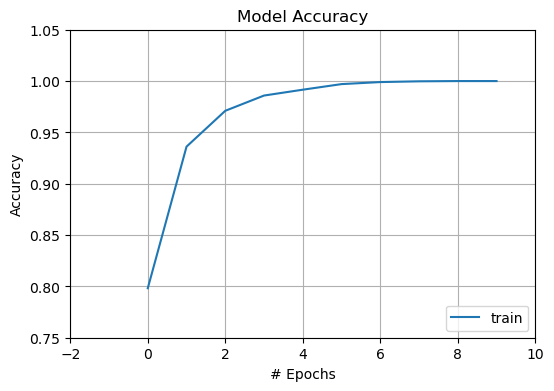

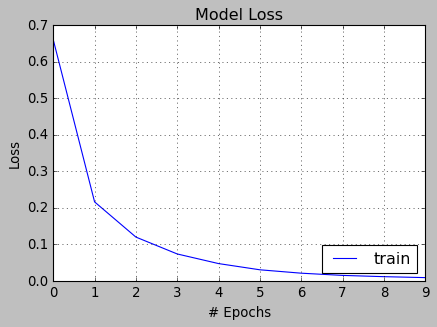

In [10]:
# accuracy v. epochs and loss v. epochs graphs
epoch = len(training_history.history.get('loss',[]))

# Draw Model Accuracy
plt.figure(2,figsize=(6,4))
plt.plot(range(epoch),training_history.history.get('accuracy'))
#plt.plot(range(epoch),training_history.history.get('val_acc'))
plt.xlabel('# Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.grid(True)
plt.legend(['train','validation'],loc=4)
plt.style.use(['classic'])

# Draw Model Loss
plt.figure(1,figsize=(6,4))
plt.plot(range(epoch),training_history.history.get('loss'))
#plt.plot(range(epoch),training_history.history.get('val_loss'))
plt.xlabel('# Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.grid(True)
plt.legend(['train','validation'], loc=4)
plt.style.use(['classic'])